# FLIP (00): Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session B - Matplotlib

`matplotlib` is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. We are going to explore `matplotlib` in interactive mode covering most common cases.


In [1]:
%matplotlib inline
# ignore this "magic" command -- it's only necessary to setup this notebook... 

## Introduction to the basics of matplotlib visualizations

Further reading: 

http://matplotlib.org/users/pyplot_tutorial.html

http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html

## Importing Matplotlib

The popular convention is to import 
the `matplotlib.pyplot` module and alias it to `plt` for easier typing:


In [2]:
import matplotlib.pyplot as plt

## Interactively plotting

Note: the following instructions only apply if you are trying things out in ipython -- which you _should_ be doing when trying out matplotlib.

When testing things out in iPython, if you want to see the chart images pop-up as you execute the charting commands, begin your iPython session by [running the `%matplotlib` magic command](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-matplotlib) (however, _don't_ include it in any standalone Python scripts):


```py
%matplotlib
import matplotlib.pyplot as plt
```

### Getting unstuck out of a stuck iPython prompt

In current versions of matplotlib, iPython, OSX, you may run into an error where the prompt just freezes. [This is a known bug](https://github.com/ipython/ipython/issues/9128). Just hit Ctrl-C a couple of times and then Enter to break out of whatever command you were stuck in (you'll have to retype the command).






## The simplest plot

The following snippet is all you need to get a chart going in matplotlib. We actually won't be using this convention going forward, but it's worth seeing the minimal amount of code needed to make a graph:

<BarContainer object of 4 artists>

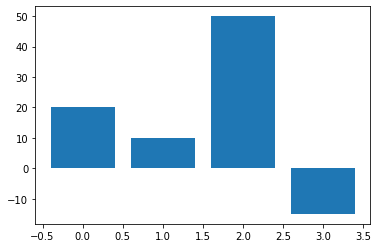

In [3]:
xvals = [0, 1, 2, 3]
yvals = [20, 10, 50, -15]
plt.bar(xvals, yvals)

## Saving the simplest plot to disk

To save to file, use the `savefig()` method:

```py
plt.savefig('hello.png')
```


### Removing the active chart (while interactively plotting)

If you are doing these commands in iPython, then a chart window will have popped up with the rendered-chart image as as soon as you executed the `plt.bar()` method. To clear the space, call the `plt.close()` method:

```py
plt.close()
```




## Making "subplots" and using `fig` and `ax`

While the invocation of methods on the global `plt` object will produce charts quick and easy, we'll be following this general convention (note that `plot()` is a method for drawing line charts):

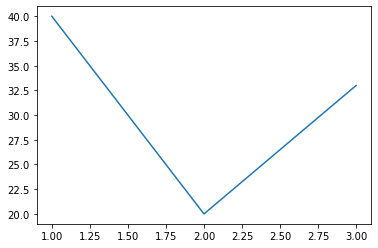

In [4]:
fig, ax = plt.subplots()
ax.plot([1,2,3], [40, 20, 33])

What's `fig`? What's `ax`? And what exactly is `plt.subplots()` doing? It's not worth explaining in these simple examples, but it's a convention worth getting into the habit of as it allows us to be more flexible in the future. And it's not too hard to memorize.

Here's another example, this time using the `scatter()` chart method:

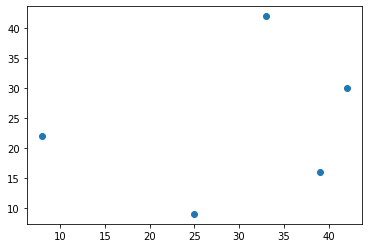

In [5]:
fig, ax = plt.subplots()
xvals = [42, 8, 33, 25, 39]
yvals = [30, 22, 42, 9, 16]
ax.scatter(xvals, yvals)


## Saving figures

Using the `fig, ax = plt.subplots()` convention, saving to disk is slightly different: call the `savefig()` method via the `fig` object:

```py
fig.savefig('helloagain.jpg')
```


## Charting multiple data series

To chart more than one series of data on a single set of axes, simply invoke the charting methods of the given axes multiple times:

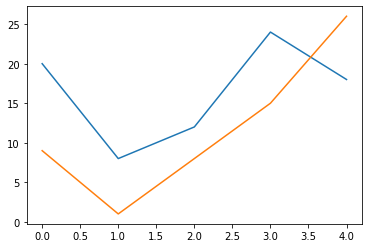

In [6]:
fig, ax = plt.subplots()
xvals = [0, 1, 2, 3, 4]
y1 = [20, 8, 12, 24, 18]
y2 = [9, 1, 8, 15, 26]
ax.plot(xvals, y1)
ax.plot(xvals, y2)

Want multiple _types_ of charts on a single set of axes? Just call different types of charts on a single axes:

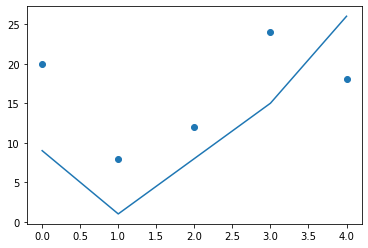

In [7]:
fig, ax = plt.subplots()
xvals = [0, 1, 2, 3, 4]
y1 = [20, 8, 12, 24, 18]
y2 = [9, 1, 8, 15, 26]
ax.scatter(xvals, y1)
ax.plot(xvals, y2)

## The importance of data structure

We've only scratched the surface of Matplotlib's visualization methods, but the main constraint we'll face is having correctly-structured data. 

For instance, matplotlib will throw an error if we attempt to chart x-values and y-values in which the relationship is not 1-to-1:


```py
xvals = [0, 1, 2]
yvals = [42]
ax.bar(xvals, yvals)

# ValueError: incompatible sizes: argument 'height' must be length 3 or scalar
```


And certain data structures don't make sense for certain charts. Here's a valid pie chart:


([<matplotlib.patches.Wedge at 0x23b2ecc5a58>,
 [Text(0.9526279355804298, 0.5500000148652441, ''),
  Text(-0.5500000594609755, 0.9526279098330699, ''),
  Text(1.0298943251329445e-07, -1.0999999999999954, '')])

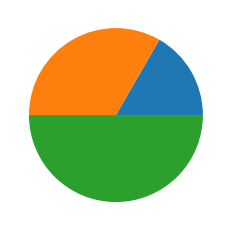

In [8]:
yvals = [10, 20, 30]
fig, ax = plt.subplots()
ax.pie(yvals)

However, the `pie()` call doesn't take in x- and y- parameters -- instead, the second argument is the `explode` value, easier shown than explained:

([<matplotlib.patches.Wedge at 0x23b2ed0e908>,
 [Text(1.1258330147768716, 0.6500000175680157, ''),
  Text(-1.55000016757184, 2.684678654984106, ''),
  Text(1.9661618934356214e-07, -2.099999999999991, '')])

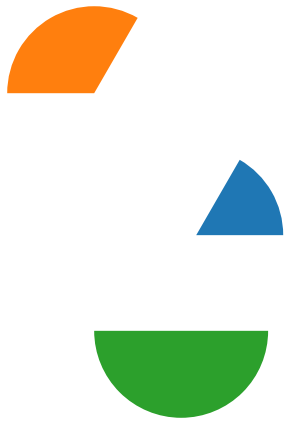

In [9]:
a = [10, 20, 30]
b = [0.2, 2, 1]

fig, ax = plt.subplots()
ax.pie(a, b)


## Stacked bar charts

Matplotlib offers a variety of ways to arrange multiple-series data. It's worth looking at the logic behind how a stacked bar chart is created.

First, start with a single bar chart:

<BarContainer object of 5 artists>

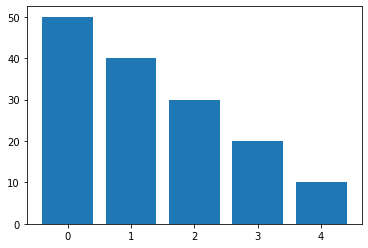

In [10]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
fig, ax = plt.subplots()
ax.bar(xvals, y1)

What is the structure of data of a stacked bar chart? It's when two data series share the same independent variable (i.e. x-axis). 

However, simply calling `bar()` twice creates overlapping bars...which is not quite what we want:

(note that I've added the `color` argument to the second call to make the different charts stand out):


<BarContainer object of 5 artists>

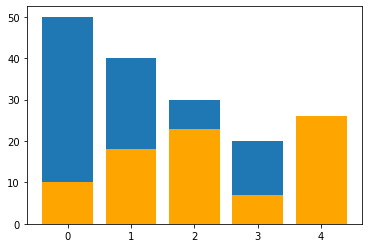

In [11]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(xvals, y1)
ax.bar(xvals, y2, color='orange')

To get the grouped effect, we need to pass the `bottom` argument to the second call of `bar()`. What do we pass into that argument? The list of y-values that are in the _first_ call of `bar()`:

<BarContainer object of 5 artists>

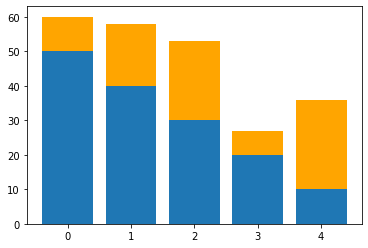

In [12]:
xvals = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(xvals, y1)
ax.bar(xvals, y2, color='orange', bottom=y1)

In effect, we've told the matplotlib plotter that we want to start the `y2` values from where each corresponding `y1` value left off, i.e. stack `y2` on top of `y1`.


What happens when the `y1` and `y2` values have _different_ x-values? Something weird...which is why you shouldn't be stacking non-aligning data series: 

<BarContainer object of 5 artists>

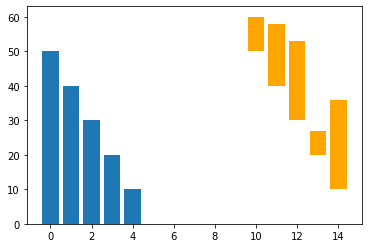

In [13]:
x1 = [0, 1, 2, 3, 4]
y1 = [50, 40, 30, 20, 10]
x2 = [ 10, 11, 12, 13, 14]
y2 = [10, 18, 23, 7, 26]
fig, ax = plt.subplots()
ax.bar(x1, y1)
ax.bar(x2, y2, color='orange', bottom=y1)

## Plotting categorical data

One more example to show how picky matplotlib is about data structure.

Pretend we have two _things_, e.g. 'apples' and 'orranges', with two corresponding y-values, e.g. `42` and `25`, to represent `42 apples` and `25 oranges`. 

Unfortunately, we can't plot the __categories__ of `apples` and `oranges` along the x-axis so easily:


```py
xvals - ['apples', 'oranges']
yvals = [42, 25]
fig, ax = plt.subplots()
ax.bar(xvals, yvals)
```

We get this arcane error:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-51-368b1dcacfa1> in <module>()
----> 1 xvals - ['apples', 'oranges']
      2 yvals = [42, 25]
      3 fig, ax = plt.subplots()
      4 ax.bar(xvals, yvals)

TypeError: unsupported operand type(s) for -: 'list' and 'list'
```

Basically, matplotlib won't deal with anything but numerical values -- integers, floats, or datetimes -- when plotting a chart. It just simply doesn't know where `apples` and `oranges` -- which we refer to as __categorical__ (as opposed to _continuous_) values -- should be positioned along the x-axis. 

So we have to hold matplotlib by the hand and tell it:

1. For the y-values of `42` and `25`, plot them against the x-values of `0` and `1` -- for now.
2. Then, label the x-axis with 0 and 1, using `ax.set_xticks()`
3. OK, where the `0` and `1` x-axis labels currently exist, replace them with `apples` and `oranges`, respectively, using `ax.set_xticklabels()`



Here's the code to do that:


<BarContainer object of 2 artists>

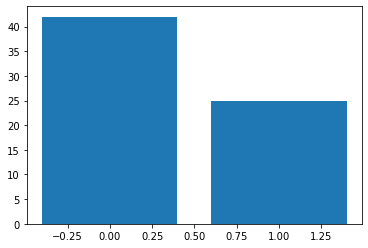

In [14]:
# Step 1

xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
ax.bar(xvals, yvals)


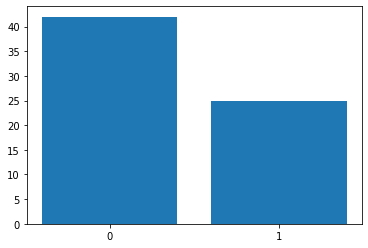

In [15]:
# Step 1 & 2

xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
# note that I specify the `align` argument in the `bar()` call:
ax.bar(xvals, yvals, align='center')
ax.set_xticks(xvals)


[Text(0, 0, 'apples'), Text(0, 0, 'oranges')]

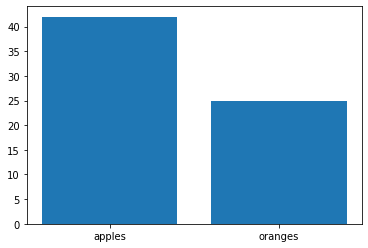

In [16]:
# Steps 1,2,3
# Step 1 & 2

xlabels = ['apples', 'oranges']
xvals = [0, 1]
yvals = [42, 25]

fig, ax = plt.subplots()
# note that I specify the `align` argument in the `bar()` call:
ax.bar(xvals, yvals, align='center')
ax.set_xticks(xvals)
ax.set_xticklabels(xlabels)

It'd be nice if matplotlib just "knew" how to deal with a set of human-readable labels for a simple bar chart. But just like most parts of Python programming, explicitness over ambiguity is required.

---
## Animation

The easiest way to make a live animation in matplotlib is to use one of the Animation classes.

See the following link for more examples and configurations

https://matplotlib.org/2.0.0/api/animation_api.html

<IPython.core.display.Javascript object>


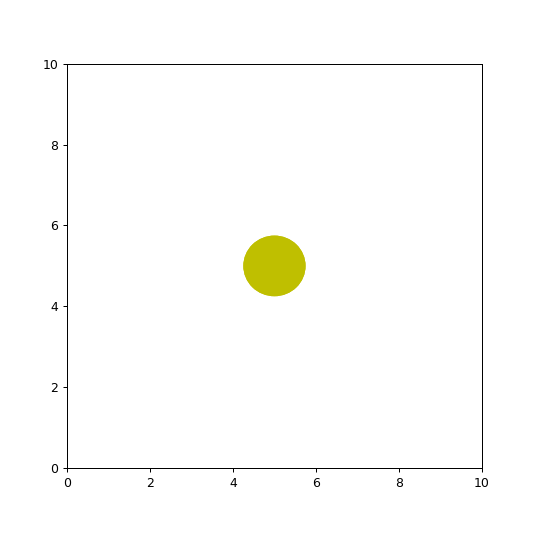

In [27]:
#%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
#%matplotlib inline


fig = plt.figure()
# fig.set_dpi(100)
fig.set_size_inches(6, 6)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i*4))
    y = 5 + 3 * np.cos(np.radians(i*4))
    patch.center = (x, y)
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)

plt.show()



<IPython.core.display.Javascript object>


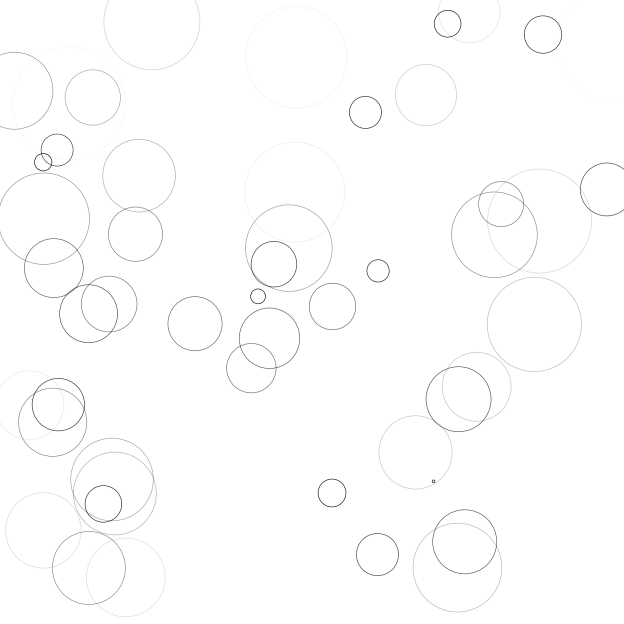

c:\users\123\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


In [28]:
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()


<IPython.core.display.Javascript object>


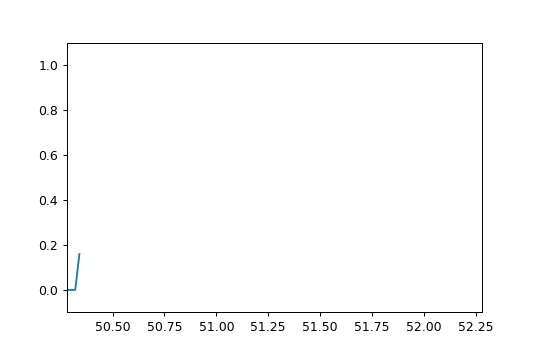

In [29]:
"""
============
Oscilloscope
============

Emulates an oscilloscope.
"""
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class Scope(object):
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=10,
                              blit=True)


plt.show()

<IPython.core.display.Javascript object>


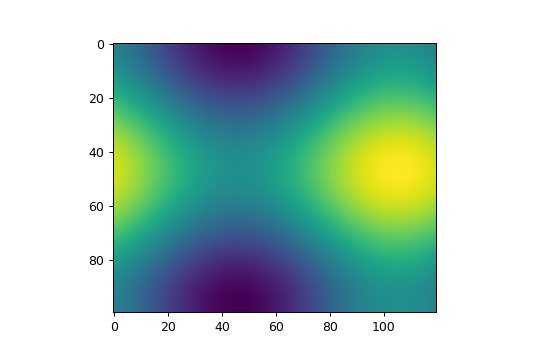

In [30]:
"""
=================
An animated image
=================

This example demonstrates how to animate an image.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


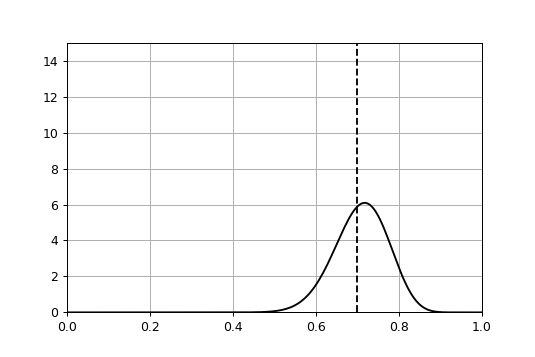

In [31]:
"""
================
The Bayes update
================

This animation displays the posterior estimate updates as it is refitted when
new data arrives.
The vertical line represents the theoretical value to which the plotted
distribution should converge.
"""

# update a distribution based on new data.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation


class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)
plt.show()

<IPython.core.display.Javascript object>


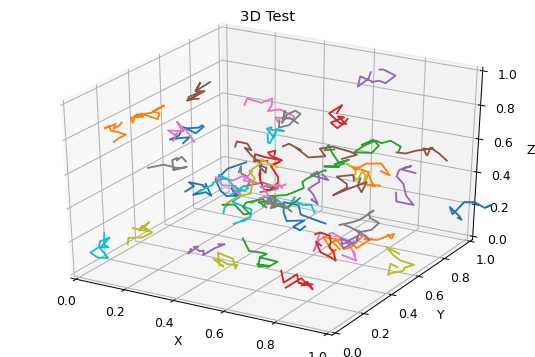

In [32]:
"""
============
3D animation
============

A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

<IPython.core.display.Javascript object>


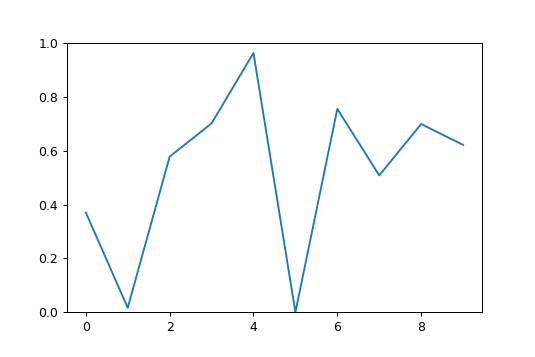

In [33]:
"""
===========
Random data
===========

An animation of random data.

"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)


def update(data):
    line.set_ydata(data)
    return line,


def data_gen():
    while True:
        yield np.random.rand(10)

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

<IPython.core.display.Javascript object>


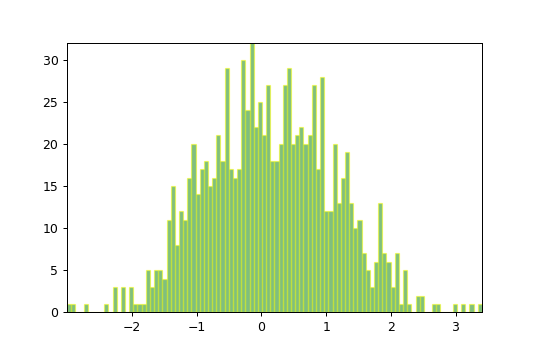

In [35]:
"""
==================
Animated histogram
==================

This example shows how to use a path patch to draw a bunch of
rectangles for an animated histogram.

"""
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

<IPython.core.display.Javascript object>


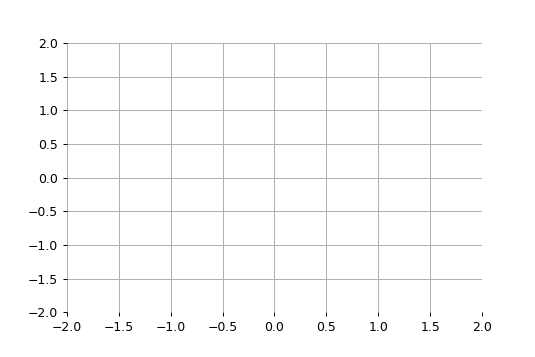

In [36]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.show()